## Average shrimp  body weight prediction model develpment using Dataset-A5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style({'font.family':'serif','font.serif':'Times New Roman'})

In [3]:
plt.rcParams.update({'font.size':12})

In [4]:
df=pd.read_excel('ABW.xlsx')
df.head()

,DOC,Salinity (ppt),SDR (cm),Water colour,Water level (cm),TSS (ml/L),Average PH,Average DO (ppm),Running aerator (HP),TDF (kg),ABW (gm),Water temperature (˚C),PH change,Ammonia (ppm),Water exchange (cm)
0,1,16,50,4,120,1.0,8.25,5.78,56,1.7,0.008,29.10,0.3,0.026,0
1,2,16,48,5,120,2.0,8.25,5.60,31,2.4,0.023,28.65,0.1,0.028,0
2,3,16,55,4,132,0.5,8.05,5.33,29,3.4,0.037,28.10,0.1,0.023,5
3,4,16,60,4,128,0.5,8.00,5.46,44,4.2,0.052,28.40,0.0,0.018,0
4,5,16,45,4,126,0.5,8.00,5.43,57,5.0,0.066,28.15,0.2,0.030,0


In [5]:
data=pd.DataFrame(df.dtypes)
data=data.rename(columns={0:'DataType'})
data

,DataType
DOC,int64
Salinity (ppt),int64
SDR (cm),int64
Water colour,int64
Water level (cm),int64
TSS (ml/L),float64
Average PH,float64
Average DO (ppm),float64
Running aerator (HP),int64
TDF (kg),float64


In [6]:
df.isnull().sum()

DOC                       0
Salinity (ppt)            0
SDR (cm)                  0
Water colour              0
Water level (cm)          0
TSS (ml/L)                0
Average PH                0
Average DO (ppm)          0
Running aerator (HP)      0
TDF (kg)                  0
ABW (gm)                  0
Water temperature (˚C)    0
PH change                 0
Ammonia (ppm)             0
Water exchange (cm)       0
dtype: int64

In [7]:
x=df[['DOC', 'Salinity (ppt)',  'Average PH', 'Average DO (ppm)', 'TSS (ml/L)', 'TDF (kg)']]
x

,DOC,Salinity (ppt),Average PH,Average DO (ppm),TSS (ml/L),TDF (kg)
0,1,16,8.25,5.78,1.0,1.7
1,2,16,8.25,5.60,2.0,2.4
2,3,16,8.05,5.33,0.5,3.4
3,4,16,8.00,5.46,0.5,4.2
4,5,16,8.00,5.43,0.5,5.0
...,...,...,...,...,...,...
395,96,22,7.70,4.78,6.0,460.0
396,97,23,7.75,4.72,4.0,400.0
397,98,23,7.75,5.33,5.0,410.0
398,99,23,7.70,4.85,6.0,400.0


In [8]:
y=df['ABW (gm)']
y

0       0.008
1       0.023
2       0.037
3       0.052
4       0.066
        ...  
395    19.100
396    19.200
397    19.300
398    19.400
399    19.500
Name: ABW (gm), Length: 400, dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler
rs=StandardScaler()
x=rs.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
linreg=LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [13]:
y_pred=linreg.predict(x_test) 

In [14]:
linreg.score(x_test, y_test)

0.9595989273627147

In [15]:
linreg.score(x_train,y_train)

0.9663070784395633

In [17]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

1.2317609084911747
2.2655548094465146
1.505176006135666
0.9595989273627147
6.670388958217032


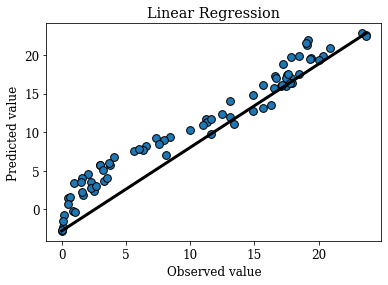

<Figure size 720x576 with 0 Axes>

In [18]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test, y_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('Linear Regression')
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
treereg=DecisionTreeRegressor(splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1, random_state=42)
treereg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
ytree_pred=treereg.predict(x_test)

In [22]:
treereg.score(x_train, y_train)

1.0

In [23]:
treereg.score(x_test,y_test)

0.9943804461705147

In [25]:
print(mean_absolute_error(y_test, ytree_pred))
print(mean_squared_error(y_test, ytree_pred))
print(np.sqrt(mean_squared_error(y_test, ytree_pred)))
print(r2_score(y_test, ytree_pred))
print(mean_absolute_percentage_error(y_test, ytree_pred))

0.35337500000000005
0.31512547500000004
0.561360378901112
0.9943804461705147
0.06697731024195748


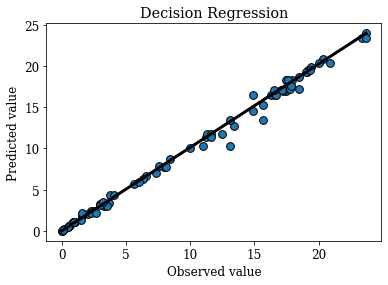

<Figure size 720x576 with 0 Axes>

In [26]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test, ytree_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [ytree_pred.min(), ytree_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('Decision Regression')
plt.show()

In [27]:
from sklearn.ensemble import AdaBoostRegressor

In [28]:
adareg=AdaBoostRegressor(random_state=42, n_estimators=50)
adareg.fit(x_train, y_train)

AdaBoostRegressor(random_state=42)

In [29]:
yada_pred=adareg.predict(x_test)

In [30]:
adareg.score(x_train, y_train)

0.9890105522801852

In [31]:
adareg.score(x_test, y_test)

0.9859668881068431

In [32]:
print(mean_absolute_error(y_test, yada_pred))
print(mean_squared_error(y_test, yada_pred))
print(np.sqrt(mean_squared_error(y_test, yada_pred)))
print(r2_score(y_test, yada_pred))
print(mean_absolute_percentage_error(y_test, yada_pred))

0.7460881143259992
0.7869292091938649
0.8870903049824549
0.9859668881068431
3.001624824399181


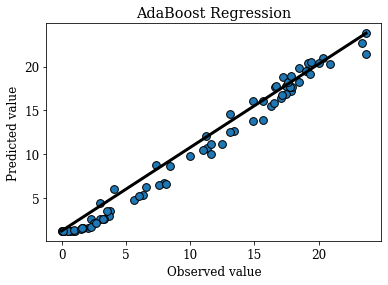

<Figure size 720x576 with 0 Axes>

In [33]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test,yada_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [yada_pred.min(), yada_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('AdaBoost Regression')
plt.show()

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
gbrreg=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, loss='ls',min_samples_leaf=1)
gbrreg.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [36]:
ygbr_pred=gbrreg.predict(x_test)

In [37]:
gbrreg.score(x_train, y_train)

0.9990989712257233

In [38]:
gbrreg.score(x_test, y_test)

0.9964806862977933

In [39]:
print(mean_absolute_error(y_test, ygbr_pred))
print(mean_squared_error(y_test, ygbr_pred))
print(np.sqrt(mean_squared_error(y_test, ygbr_pred)))
print(r2_score(y_test, ygbr_pred))
print(mean_absolute_percentage_error(y_test, ygbr_pred))

0.34266560725634176
0.19735114846002874
0.4442422182323836
0.9964806862977933
0.18541719700967488


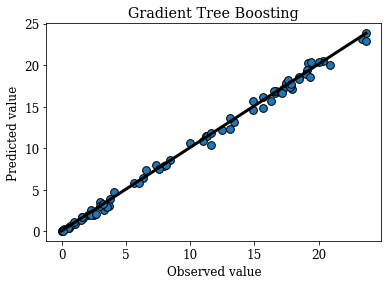

<Figure size 720x576 with 0 Axes>

In [40]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test,ygbr_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [ygbr_pred.min(), ygbr_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('Gradient Tree Boosting')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf=RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=42,max_depth=None)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
yrf_pred=rf.predict(x_test)

In [44]:
rf.score(x_train, y_train)

0.99942593319744

In [45]:
rf.score(x_test, y_test)

0.9965780099318104

In [46]:
print(mean_absolute_error(y_test, yrf_pred))
print(mean_squared_error(y_test, yrf_pred))
print(np.sqrt(mean_squared_error(y_test, yrf_pred)))
print(r2_score(y_test, yrf_pred))
print(mean_absolute_percentage_error(y_test, yrf_pred))

0.3056425000000015
0.19189356991750123
0.43805658300897754
0.9965780099318104
0.06458172758865001


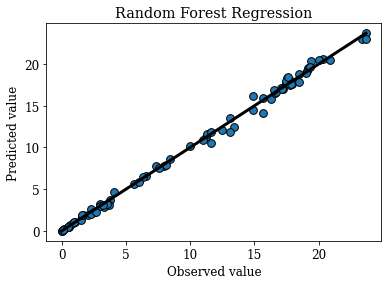

<Figure size 720x576 with 0 Axes>

In [47]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test,yrf_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [yrf_pred.min(), yrf_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('Random Forest Regression')
plt.show()

In [48]:
Dif=pd.DataFrame(np.c_[y_test,y_pred, yada_pred, yrf_pred],columns=["acutual value","predicted value(linear)", "ADA predicted value", "RF Predicted value"])

In [49]:
Dif.head()

,acutual value,predicted value(linear),ADA predicted value,RF Predicted value
0,0.905,-0.251217,1.222077,1.00779
1,17.840,17.034150,17.181222,17.97662
2,3.800,5.701650,3.456326,3.76034
3,1.010,-0.363683,1.222077,1.04970
4,23.380,22.832850,22.729565,22.98710
